In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator, DayLocator

In [3]:
raw_df = pd.read_csv("./data/daylio_export_2020_10_22.csv", 
                     usecols=["full_date", "weekday", "mood", "activities"])

In [4]:
raw_df.head()

,full_date,weekday,mood,activities
0,2020-10-22,Thursday,bad,"Headache | Dairy | Fruits | Grains, beans and ..."
1,2020-10-21,Wednesday,meh,"Headache | Dairy | Fruits | Grains, beans and ..."
2,2020-10-20,Tuesday,meh,"Headache | Dairy | Fruits | Grains, beans and ..."
3,2020-10-19,Monday,meh,Dairy | Red Meat | Confections | Vegetables | ...
4,2020-10-18,Sunday,good,"Family | Dairy | Fruits | Grains, beans and le..."


In [5]:
unique_activities = raw_df["activities"].str.split("\s*\|\s*", expand=True).stack().unique()
unique_activities

array(['Headache', 'Dairy', 'Fruits', 'Grains, beans and legumes',
       'Red Meat', 'Vegetables', 'Tea', 'Meditation', 'Piano', 'Studying',
       'Admin', 'Cooking', 'Groceries', 'Ibuprofen', 'Work',
       'Programming', 'Cleaning', 'Coffee', 'Confections', 'Family',
       'White Meat', 'Restaurant', 'Alcohol', 'Friends', 'Climbing',
       'Cold/Flu', 'Book/Article Reading', 'Shave/Trim', 'Laundry',
       'Networking', 'Shopping', 'Walk', 'Antihistamines', 'Writing',
       'Doctor', 'Paracetamol', 'Haircut', 'Vote', 'Diarrhea',
       'Party/Social Gathering', 'Travel', 'Tourism', 'Gym', 'Running',
       'Gaming', 'Other Illness', 'Swimming', 'Cinema', 'Job Offer',
       'Streaming', 'Football', 'Theatre', 'Museum', 'Illness', 'Meat',
       'Fish', 'Rejection', 'Hiking', 'Guitar', 'Interview', 'Marijuana',
       'Pulses', 'date', 'Concert', 'Yoga', 'Cycling',
       'skate/surf/snow/sand board', 'Dancing', 'Singing', 'Sailing',
       'Scuba', 'Camping', 'Feedback', 'Exam',

In [6]:
list_df = raw_df.copy()
list_df["activities"] = raw_df.activities.apply(lambda x: x.split(" | "))

In [7]:
def count_activity(row):
    new_row = row
    mask = [1 if activity in row["activities"] else 0 for activity in unique_activities]
    new_row[4:] = mask
    return new_row
#     for activity in unique_activities:
#         if activity in row["activities"]:
#             row[activity] = 1

In [8]:
final_df = list_df.copy()
for activity in unique_activities:
    final_df[activity] = 0
final_df = final_df.apply(lambda x: count_activity(x), axis=1)
final_df = final_df.set_index("full_date")
final_df.index = pd.to_datetime(final_df.index)

In [9]:
jul_oct_2020_df = final_df.loc['2020-10-22':'2020-7-22']
time_jul_oct_2020 = jul_oct_2020_df.index
headache_jul_oct_2020 = jul_oct_2020_df["Headache"]
ibuprofen_jul_oct_2020 = jul_oct_2020_df["Ibuprofen"]
paracetamol_jul_oct_2020 = jul_oct_2020_df["Paracetamol"]
caffeine_jul_oct_2020 = jul_oct_2020_df["Coffee"]

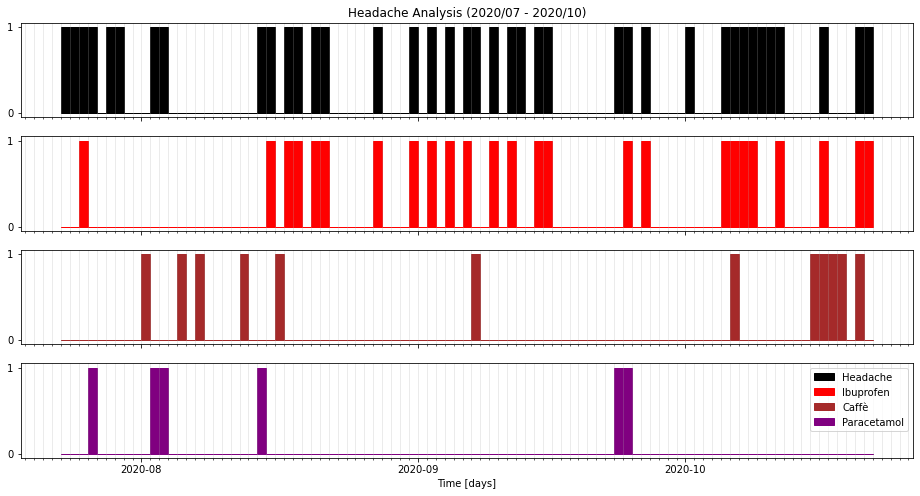

In [62]:
plt.figure(figsize=(16,8))
dloc = DayLocator()
mloc = MonthLocator()

ax1 = plt.subplot(411)
ax2 = plt.subplot(412, sharex = ax1, sharey=ax1)
ax3 = plt.subplot(413, sharex = ax1, sharey=ax1)
ax4 = plt.subplot(414, sharex = ax1, sharey=ax1)


l1 = ax1.fill_between(time_jul_oct_2020, headache_jul_oct_2020, color='black', step="pre")
l2 = ax2.fill_between(time_jul_oct_2020, ibuprofen_jul_oct_2020, color='red', step="pre")
l3 = ax3.fill_between(time_jul_oct_2020, caffeine_jul_oct_2020, color='brown', step="pre")
l4 = ax4.fill_between(time_jul_oct_2020, paracetamol_jul_oct_2020, color='purple', step="pre")

ax1.xaxis.set_major_locator(mloc)
ax1.xaxis.set_minor_locator(dloc)
ax1.set_yticks([0,1])

ax1.tick_params(axis="x", which="both", labelbottom=False)
ax2.tick_params(axis="x", which="both", labelbottom=False)
ax3.tick_params(axis="x", which="both", labelbottom=False)

ax1.grid(which="both", axis="x", alpha=0.3)
ax2.grid(which="both", axis="x", alpha=0.3)
ax3.grid(which="both", axis="x", alpha=0.3)
ax4.grid(which="both", axis="x", alpha=0.3)

ax1.set_title('Headache Analysis (2020/07 - 2020/10)')
plt.xlabel("Time [days]")

plt.legend([l1, l2, l3, l4], ["Headache", "Ibuprofen", "Caffè", "Paracetamol"], loc = 'upper right')
plt.show()
# plt.savefig("2020-07_2020-10.jpeg", bbox_inches='tight')

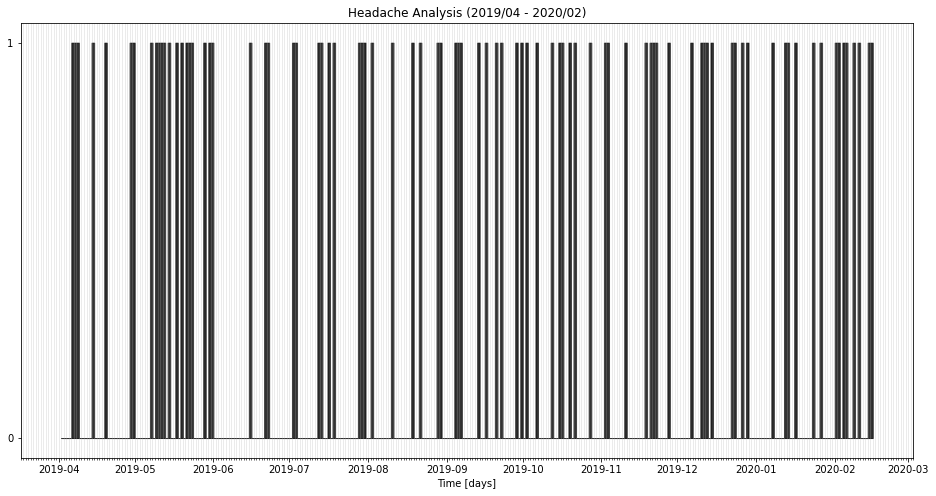

In [63]:
df_2019_2020 = final_df.loc['2020-02-16':'2019-04-01']
time_2019_2020 = df_2019_2020.index
headache_2019_2020 = df_2019_2020["Headache"]

f,ax = plt.subplots(figsize=(16,8))
# ax.plot(time_2019_2020, headache_2019_2020, color='black', drawstyle='steps')

# ax.step(time_2019_2020, headache_2019_2020, color='black')
ax.fill_between(time_2019_2020, headache_2019_2020, step="pre", alpha=0.8, color='black')

ax.xaxis.set_major_locator(mloc)
ax.xaxis.set_minor_locator(dloc)
ax.set_yticks([0,1])

ax.grid(which="both", axis="x", alpha=0.3)


ax.set_title('Headache Analysis (2019/04 - 2020/02)')
plt.xlabel("Time [days]")

plt.show()
# plt.savefig("2019-04_2020-02.jpeg", bbox_inches='tight')

In [85]:
df = pd.read_csv(
    "data/processed/daylio.csv",
    usecols=["full_date", "Headache"],
    index_col="full_date",
    parse_dates=True,
)

In [96]:
final_df["Exercise"] = final_df[
    [
        "Climbing",
        "Walk",
        "Running",
        "Gym",
        "Swimming",
        "Football",
        "Hiking",
        "Cycling",
        "skate/surf/snow/sand board",
        "Dancing",
    ]
].any(axis=1)

In [97]:
final_df

,weekday,mood,Headache,Dairy,Fruits,"Grains, beans and legumes",Red Meat,Vegetables,Tea,Meditation,...,Sailing,Scuba,Camping,Feedback,Exam,Dentist,Job Hunting,Church,Relax,Exercise
full_date,,,,,,,,,,,,,,,,,,,,,
2020-10-22,Thursday,bad,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2020-10-21,Wednesday,meh,True,True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2020-10-20,Tuesday,meh,True,True,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2020-10-19,Monday,meh,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-10-18,Sunday,good,False,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-15,Friday,good,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-02-14,Thursday,good,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-02-13,Wednesday,good,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
unique_activities = raw_df["activities"].str.split("\s*\|\s*", expand=True).stack().unique()
unique_activities

array(['Headache', 'Dairy', 'Fruits', 'Grains, beans and legumes',
       'Red Meat', 'Vegetables', 'Tea', 'Meditation', 'Piano', 'Studying',
       'Admin', 'Cooking', 'Groceries', 'Ibuprofen', 'Work',
       'Programming', 'Cleaning', 'Coffee', 'Confections', 'Family',
       'White Meat', 'Restaurant', 'Alcohol', 'Friends', 'Climbing',
       'Cold/Flu', 'Book/Article Reading', 'Shave/Trim', 'Laundry',
       'Networking', 'Shopping', 'Walk', 'Antihistamines', 'Writing',
       'Doctor', 'Paracetamol', 'Haircut', 'Vote', 'Diarrhea',
       'Party/Social Gathering', 'Travel', 'Tourism', 'Gym', 'Running',
       'Gaming', 'Other Illness', 'Swimming', 'Cinema', 'Job Offer',
       'Streaming', 'Football', 'Theatre', 'Museum', 'Illness', 'Meat',
       'Fish', 'Rejection', 'Hiking', 'Guitar', 'Interview', 'Marijuana',
       'Pulses', 'date', 'Concert', 'Yoga', 'Cycling',
       'skate/surf/snow/sand board', 'Dancing', 'Singing', 'Sailing',
       'Scuba', 'Camping', 'Feedback', 'Exam',